<a href="https://colab.research.google.com/github/khalidpark/Projects/blob/main/n113a_data_manipulation_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/89746244-a6e2a200-daf3-11ea-9314-7863d544d73c.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 3*

# 📝 Assignment

---

## 1. Concat 

세션시간에 다뤘던 6개의 데이터를 1개로 합치세요.

단, 모든 feature, 모든 데이터에 대해서가 아닌

- 매출액
- 자산총계
- EPS

- 제일 최근 분기의 데이터

에 대해서만 하면 됩니다.

||매출액|자본총계|EPS(원)|종목명|
|:-:|:-:|:-:|:-:|:-:|
|2020/09|6,243|10,897|453|하이트진로|
|...|...|...|...|...|
|2020/09|2,613|2,695|62|하림|

(첫부분은 값이 달라도 되며, 결과 shape는 6,4입니다.)

힌트 : 
- 데이터를 transpose
- column의 이름을 변경 및 설정
- 데이터의 일부 feature 선택
- `종목명`이라는 feature 지정
- 이후 `concat`으로 합치기
- 합친 이후의 index를 종목명으로 설정 및 drop

이라는 단계를 거치면 될겁니다.

In [1]:
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv').transpose()

def mydf(myurl):
    df = pd.read_csv(urlhead + myurl).transpose()
    new_header = df.iloc[0] #grab the first row for the header
    df = df[1:] #take the data less the header row
    df.columns = new_header #set the header row as the df header
    return df[-1:]

df = pd.concat([mydf('000080.csv'), mydf('000890.csv'), mydf('005300.csv'), mydf('027740.csv'), mydf('035810.csv'), mydf('136480.csv')])

df

Unnamed: 0,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
2020/09\n(IFRS연결),"6,243",644,644,465,322,323,0,"39,617","28,720","10,897","10,893",5,"3,688","-3,009",-410,-594,382,"-3,391","15,995",10.31,5.17,6.89,2.04,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"
2020/09\n(IFRS연결),205,6,6,5,4,4,NaN,"1,555",739,816,816,NaN,637,-42,-10,-34,18,-60,465,2.92,2.15,-17.61,-8.99,90.59,27.50,3,NaN,640,1.41,NaN,NaN,NaN,"127,449,373"
2020/09\n(IFRS연결),"5,980",293,293,194,155,147,7,"34,066","21,970","12,096","11,942",154,44,"1,284",-958,"1,009",315,969,"15,489",4.90,2.59,-7.07,-2.50,181.63,"43,300.25","1,682",NaN,"145,448",0.70,0,NaN,0.00,"7,993,460"
2020/09\n(IFRS연결),521,-89,-89,-104,-104,-104,0,"1,897","1,273",624,622,2,792,39,39,-85,3,36,839,-17.17,-19.95,-50.65,-21.41,204.06,-33.01,-61,NaN,368,2.37,0,NaN,0.00,"168,807,631"
2020/06\n(IFRS연결),"4,108",246,246,816,657,659,-1,"18,966","11,432","7,534","4,351","3,183",282,-33,-103,"1,051",82,-115,"8,639",5.98,16.00,17.65,2.18,151.74,"1,538.72","1,168",3.98,"7,821",0.64,NaN,NaN,0.00,"55,640,623"
2020/09\n(IFRS연결),"2,613",1,1,17,66,66,0,"8,550","5,855","2,695","2,689",6,531,150,-233,-257,127,23,"5,016",0.06,2.51,0.69,0.20,217.22,473.10,62,141.13,"2,532",1.01,NaN,NaN,NaN,"106,209,702"


In [2]:
df2 = pd.DataFrame(
    {'종목' : ['000080', '000890', '005300', '027740', '035810', '136480'],
     '종목명': ['하이트진로', '보해양조', '롯데칠성', '마니커', '이지홀딩스', '하림']}
)
df2

,종목,종목명
0,000080,하이트진로
1,000890,보해양조
2,005300,롯데칠성
3,027740,마니커
4,035810,이지홀딩스
5,136480,하림


In [3]:
df3 = pd.concat([df.reset_index(), df2], axis = 1)
df3

,index,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주),종목,종목명
0,2020/09\n(IFRS연결),"6,243",644,644,465,322,323,0,"39,617","28,720","10,897","10,893",5,"3,688","-3,009",-410,-594,382,"-3,391","15,995",10.31,5.17,6.89,2.04,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611",000080,하이트진로
1,2020/09\n(IFRS연결),205,6,6,5,4,4,NaN,"1,555",739,816,816,NaN,637,-42,-10,-34,18,-60,465,2.92,2.15,-17.61,-8.99,90.59,27.50,3,NaN,640,1.41,NaN,NaN,NaN,"127,449,373",000890,보해양조
2,2020/09\n(IFRS연결),"5,980",293,293,194,155,147,7,"34,066","21,970","12,096","11,942",154,44,"1,284",-958,"1,009",315,969,"15,489",4.90,2.59,-7.07,-2.50,181.63,"43,300.25","1,682",NaN,"145,448",0.70,0,NaN,0.00,"7,993,460",005300,롯데칠성
3,2020/09\n(IFRS연결),521,-89,-89,-104,-104,-104,0,"1,897","1,273",624,622,2,792,39,39,-85,3,36,839,-17.17,-19.95,-50.65,-21.41,204.06,-33.01,-61,NaN,368,2.37,0,NaN,0.00,"168,807,631",027740,마니커
4,2020/06\n(IFRS연결),"4,108",246,246,816,657,659,-1,"18,966","11,432","7,534","4,351","3,183",282,-33,-103,"1,051",82,-115,"8,639",5.98,16.00,17.65,2.18,151.74,"1,538.72","1,168",3.98,"7,821",0.64,NaN,NaN,0.00,"55,640,623",035810,이지홀딩스
5,2020/09\n(IFRS연결),"2,613",1,1,17,66,66,0,"8,550","5,855","2,695","2,689",6,531,150,-233,-257,127,23,"5,016",0.06,2.51,0.69,0.20,217.22,473.10,62,141.13,"2,532",1.01,NaN,NaN,NaN,"106,209,702",136480,하림


In [4]:
df4 = df3[['매출액', '자산총계', 'EPS(원)','종목명']]
df4

,매출액,자산총계,EPS(원),종목명
0,"6,243","39,617",453,하이트진로
1,205,"1,555",3,보해양조
2,"5,980","34,066","1,682",롯데칠성
3,521,"1,897",-61,마니커
4,"4,108","18,966","1,168",이지홀딩스
5,"2,613","8,550",62,하림


## 2. Reshape 

방금 만든 데이터를 tidy 형태로 만드세요.

|종목명|Feature|Value|
|:-:|:-:|:-:|
|하이트진로|매출액|6243|
|하이트진로|자본총계|10897|
|하이트진로|EPS|6243|
|...|...|...|
|하림|매출액|2613|
|하림|자본총계|2695|
|하림|EPS|62|



In [5]:
import numpy as np
import seaborn as sns

tidy = df4.melt(id_vars = '종목명', value_vars = ['매출액', '자산총계','EPS(원)'])

tidy.columns = ['종목명', 'Feature','Value']

tidy2 = tidy.sort_values(by='종목명', ascending=False)

tidy2

,종목명,Feature,Value
0,하이트진로,매출액,"6,243"
12,하이트진로,EPS(원),453
6,하이트진로,자산총계,"39,617"
5,하림,매출액,"2,613"
11,하림,자산총계,"8,550"
17,하림,EPS(원),62
4,이지홀딩스,매출액,"4,108"
10,이지홀딩스,자산총계,"18,966"
16,이지홀딩스,EPS(원),"1,168"
7,보해양조,자산총계,"1,555"


## 3. Merge & Join +

pandas merge의 options중 how 에는 여러가지 옵션들이 있습니다.

공식 레퍼런스를 검색, 참조하여

아래 코드를 바탕으로 

다음과 같은 결과물을 만드는 코드를 작성하세요

|key1|key2|A|B|C|D|
|:-:|:-:|:-:|:-:|:-:|:-:|
|K0|K0|A0|B0|C0|D0|
|K0|K1|A1|B1|NaN|NaN|
|K1|K0|A2|B2|C1|D1|
|K1|K0|A2|B2|C2|D2|
|K2|K1|A3|B3|NaN|NaN|





In [6]:
import pandas as pd

left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [7]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [8]:
total = left.merge(right, how='outer', on=['key1','key2'])
total

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


## 🔥 도전과제

아래 링크들을 참조하여, 
특정 테마별로 포함되어 있는 종목의 데이터를 직접 csv형태로 수집하고 (아래 적힌 3개씩)

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=408>

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=36>

- 최종 분기에 해당하는 데이터

- 테마별 평균 데이터를 결과물로 만드는 코드를 작성하세요.

단, 모든 feature에 대해서가 아닌

- 매출액
- 자산총계
- EPS

에 대해서만 하면 됩니다.

|종목명|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|대한해운|...|...|...|...|
|팬오션|...|...|...|...|
|KSS해운|...|...|...|...|
|세미콘라이트|...|...|...|...|
|오성첨단소재|...|...|...|...|
|에이아이비트|...|...|...|...|

---

|테마|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|해운|...|...|...|
|마리화나(대마)|...|...|...|

이후 아래의 예시 처럼 seaborn을 사용하여 결과를 barplot으로 시각화하세요.

단, 한글이 깨지는 에러를 여러분이 직접 고쳐야합니다.

In [9]:
df_sea = pd.DataFrame(
    {'종목명' : ['대한해운', 'KSS해운', '흥아해운'],
     '매출액': ['10057', '2312', '1022'],
     '자산총계': ['33409', '9467', '4310'],
     'EPS': ['68', '1209', '-237']}
)
df_sea

,종목명,매출액,자산총계,EPS
0,대한해운,10057,33409,68
1,KSS해운,2312,9467,1209
2,흥아해운,1022,4310,-237


In [10]:
df_daema = pd.DataFrame(
    {'종목명' : ['한국비엔씨', '마이더스AI', '세미콘라이트'],
     '매출액': ['177', '130', '242'],
     '자산총계': ['496', '556', '419'],
     'EPS': ['-110', '-529', '-121']}
)
df_daema

,종목명,매출액,자산총계,EPS
0,한국비엔씨,177,496,-110
1,마이더스AI,130,556,-529
2,세미콘라이트,242,419,-121


In [11]:
df = pd.concat([df_sea,df_daema], axis = 0)
df

,종목명,매출액,자산총계,EPS
0,대한해운,10057,33409,68
1,KSS해운,2312,9467,1209
2,흥아해운,1022,4310,-237
0,한국비엔씨,177,496,-110
1,마이더스AI,130,556,-529
2,세미콘라이트,242,419,-121


In [12]:
df_type = pd.DataFrame(
    {'종목명' : ['대한해운', 'KSS해운', '흥아해운', '한국비엔씨', '마이더스AI', '세미콘라이트'],
     '테마': ['해운', '해운', '해운', '대마', '대마', '대마']}
)
df_type

,종목명,테마
0,대한해운,해운
1,KSS해운,해운
2,흥아해운,해운
3,한국비엔씨,대마
4,마이더스AI,대마
5,세미콘라이트,대마


In [13]:
#seaborn 작업을 하기 위해서 tidy 데이타로 변환 필요
#df_total 과 df_type 을 merge 한다 (기준은 종목명)

df2 = df.merge(df_type, how = 'inner', on = '종목명')
df2

,종목명,매출액,자산총계,EPS,테마
0,대한해운,10057,33409,68,해운
1,KSS해운,2312,9467,1209,해운
2,흥아해운,1022,4310,-237,해운
3,한국비엔씨,177,496,-110,대마
4,마이더스AI,130,556,-529,대마
5,세미콘라이트,242,419,-121,대마


In [14]:
df2.groupby('테마').매출액.sum()

테마
대마        177130242
해운    1005723121022
Name: 매출액, dtype: object

In [15]:
df2['매출액'] = pd.to_numeric(df2['매출액'])
df2['자산총계'] = pd.to_numeric(df2['자산총계'])
df2['EPS'] = pd.to_numeric(df2['EPS'])
df2

,종목명,매출액,자산총계,EPS,테마
0,대한해운,10057,33409,68,해운
1,KSS해운,2312,9467,1209,해운
2,흥아해운,1022,4310,-237,해운
3,한국비엔씨,177,496,-110,대마
4,마이더스AI,130,556,-529,대마
5,세미콘라이트,242,419,-121,대마


In [16]:
df3 = df2.groupby('테마').매출액.sum()
df4 = df2.groupby('테마').자산총계.sum()
df5 = df2.groupby('테마').EPS.sum()

df6 = pd.concat([df3,df4,df5], axis = 1)
df6

,매출액,자산총계,EPS
테마,,,
대마,549,1471,-760
해운,13391,47186,1040


In [17]:
#seaborn 작업하기 위해 tidy 데이타로 변환작업

df6 = df6.reset_index()
df6


,테마,매출액,자산총계,EPS
0,대마,549,1471,-760
1,해운,13391,47186,1040


In [18]:
tidy = df6.melt(id_vars = '테마', value_vars = ['매출액','자산총계','EPS'])
tidy

,테마,variable,value
0,대마,매출액,549
1,해운,매출액,13391
2,대마,자산총계,1471
3,해운,자산총계,47186
4,대마,EPS,-760
5,해운,EPS,1040


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_te

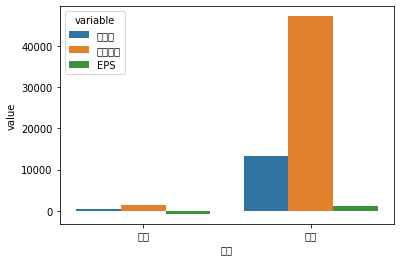

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

barplot = sns.barplot(x = '테마', y='value', hue='variable', data = tidy)

#한글이 깨지는 문제 발생

In [20]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


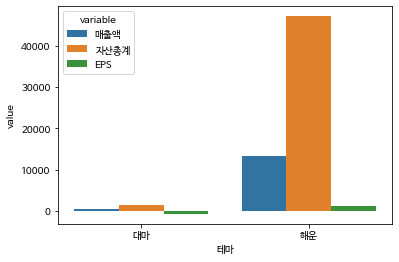

In [21]:
plt.rc('font', family='NanumBarunGothic') 

barplot = sns.barplot(x = '테마', y='value', hue='variable', data = tidy)